### 종합 실습
- 전국 교통사고 2017년 데이터를 이용해서 시각화 작업을 해보자

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [4]:
# 데이터 불러오기
data = pd.read_csv("./data/Traffic_Accident_2017.csv", encoding="euc-kr")

In [5]:
data.columns

Index(['발생년', '발생년월일시', '발생분', '주야', '요일', '사망자수', '사상자수', '중상자수', '경상자수',
       '부상신고자수', '발생지시도', '발생지시군구', '사고유형_대분류', '사고유형_중분류', '사고유형', '법규위반_대분류',
       '법규위반', '도로형태_대분류', '도로형태', '당사자종별_1당_대분류', '당사자종별_1당', '당사자종별_2당_대분류',
       '당사자종별_2당', '발생위치X_UTMK', '발생위치Y_UTMK', '경도', '위도'],
      dtype='object')

In [7]:
# 1. 요일별 사고 건수 count
temp = data['요일'].value_counts()
# 데이터 높은 값부터 나옴.. 월~일로 재배치
y = temp[['월', '화', '수', '목', '금', '토', '일']]
y

요일
월    603
화    608
수    565
목    586
금    603
토    596
일    504
Name: count, dtype: int64

In [10]:
# 1-1. 한글 폰트 깨질 경우
plt.rcParams['font.family'] = 'Malgun Gothic'

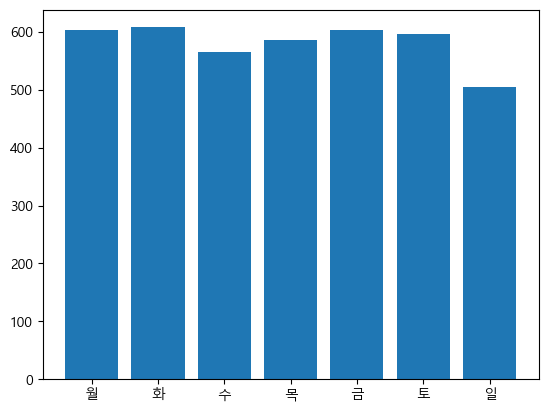

In [11]:
# 2. bar 차트 그려보기
x = y.index
plt.bar(x,y)
plt.show()

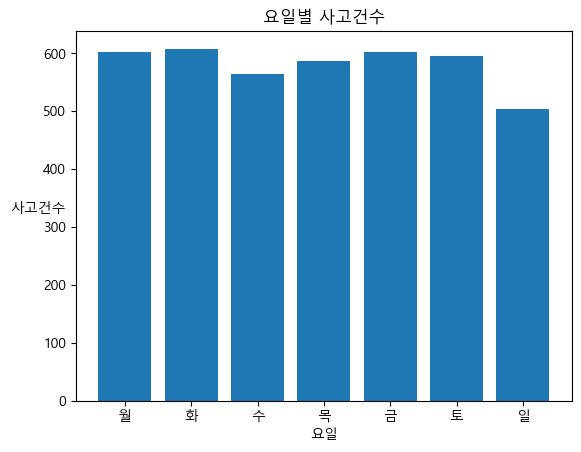

In [12]:
# 3. 그래프 설명 추가하기 (라벨 붙이기)
x = y.index
plt.bar(x,y)
plt.xlabel("요일")
plt.y0.label("사고건수", rotation = 0)
plt.title("요일별 사고건수")

plt.show()

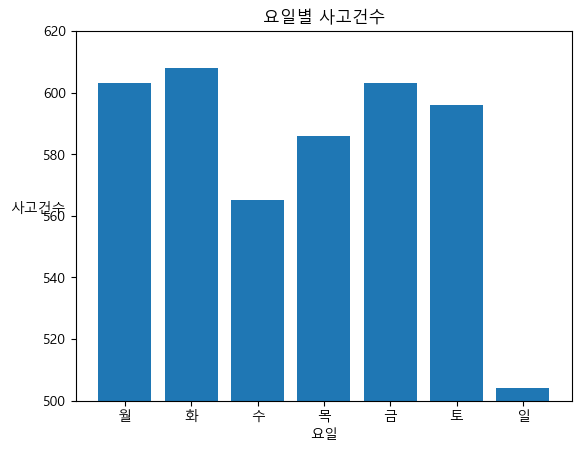

In [15]:
# 4. y축 범위 설정하기
x = y.index
plt.bar(x,y)
plt.xlabel("요일")
plt.ylabel("사고건수", rotation = 0)
plt.title("요일별 사고건수")
plt.ylim(500,620)

plt.show()

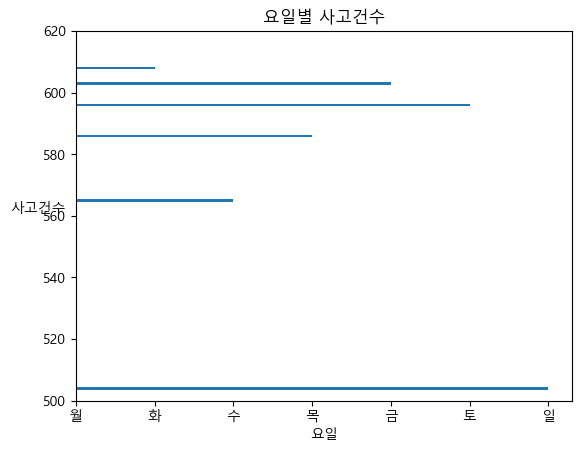

In [16]:
x = y.index
plt.barh(y,x)
plt.xlabel("요일")
plt.ylabel("사고건수", rotation = 0)
plt.title("요일별 사고건수")
plt.ylim(500,620)

plt.show()

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4065 entries, 0 to 4064
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   발생년           4065 non-null   int64  
 1   발생년월일시        4065 non-null   int64  
 2   발생분           4065 non-null   int64  
 3   주야            4065 non-null   object 
 4   요일            4065 non-null   object 
 5   사망자수          4065 non-null   int64  
 6   사상자수          4065 non-null   int64  
 7   중상자수          4065 non-null   int64  
 8   경상자수          4065 non-null   int64  
 9   부상신고자수        4065 non-null   int64  
 10  발생지시도         4065 non-null   object 
 11  발생지시군구        4065 non-null   object 
 12  사고유형_대분류      4065 non-null   object 
 13  사고유형_중분류      4065 non-null   object 
 14  사고유형          4065 non-null   object 
 15  법규위반_대분류      4065 non-null   object 
 16  법규위반          4065 non-null   object 
 17  도로형태_대분류      4065 non-null   object 
 18  도로형태          4065 non-null 

### 종합 연습문제 2 <br>
- 차대차 사건 중 죽거나 다친 사람이 많은 발생지 시도별

In [20]:
data['사고유형_대분류'].unique()

array(['차대차', '차대사람', '차량단독', '철길건널목'], dtype=object)

In [21]:
# 차대차 사건만 뽑아오자 - 사고유형_대분류
ctc = data[data["사고유형_대분류"] == "차대차"]
ctc

,발생년,발생년월일시,발생분,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,...,도로형태_대분류,도로형태,당사자종별_1당_대분류,당사자종별_1당,당사자종별_2당_대분류,당사자종별_2당,발생위치X_UTMK,발생위치Y_UTMK,경도,위도
0,2017,2017010101,15,야간,일,1,2,1,0,0,...,단일로,기타단일로,승용차,승용차,승용차,승용차,933501,1700129,126.768634,35.294464
2,2017,2017010102,43,야간,일,1,2,0,1,0,...,단일로,기타단일로,승용차,승용차,승용차,승용차,916497,1842880,126.566631,36.580069
8,2017,2017010118,33,야간,일,1,3,1,1,0,...,단일로,기타단일로,승용차,승용차,화물차,화물차,922514,1476665,126.667913,33.278582
9,2017,2017010120,0,야간,일,1,7,4,2,0,...,단일로,기타단일로,승용차,승용차,승용차,승용차,962530,1823895,127.082074,36.411838
17,2017,2017010209,0,주간,월,1,2,1,0,0,...,단일로,기타단일로,승용차,승용차,승용차,승용차,1134705,1810932,128.999992,36.286293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4050,2017,2017123009,58,주간,토,1,1,0,0,0,...,단일로,기타단일로,승용차,승용차,건설기계,건설기계,1030259,1674021,127.831844,35.060801
4055,2017,2017123023,50,야간,토,1,6,2,3,0,...,단일로,기타단일로,승용차,승용차,승용차,승용차,948703,1679181,126.937322,35.106089
4058,2017,2017123112,10,주간,일,1,1,0,0,0,...,교차로,교차로부근,이륜차,이륜차,승합차,승합차,1111054,1758873,128.729654,35.820218
4060,2017,2017123118,10,야간,일,1,4,1,0,2,...,단일로,기타단일로,화물차,화물차,화물차,화물차,1044531,1682838,127.988833,35.139774


In [22]:
ctc['사고유형_대분류'].value_counts()

사고유형_대분류
차대차    1642
Name: count, dtype: int64

In [24]:
# 해당하는 데이터의 발생지 시도별 합계를 구해보자
ctcp = ctc[['사상자수','발생지시도']].groupby('발생지시도').sum()
ctcp

,사상자수
발생지시도,
강원,214
경기,824
경남,248
경북,287
광주,87
대구,115
대전,61
부산,107
서울,197


In [25]:
# 그래프의 x축과 y축 설정
x = ctcp.index
y = ctcp.values

In [33]:
y

array([[214],
       [824],
       [248],
       [287],
       [ 87],
       [115],
       [ 61],
       [107],
       [197],
       [ 17],
       [ 73],
       [ 66],
       [298],
       [244],
       [ 50],
       [351],
       [261]], dtype=int64)

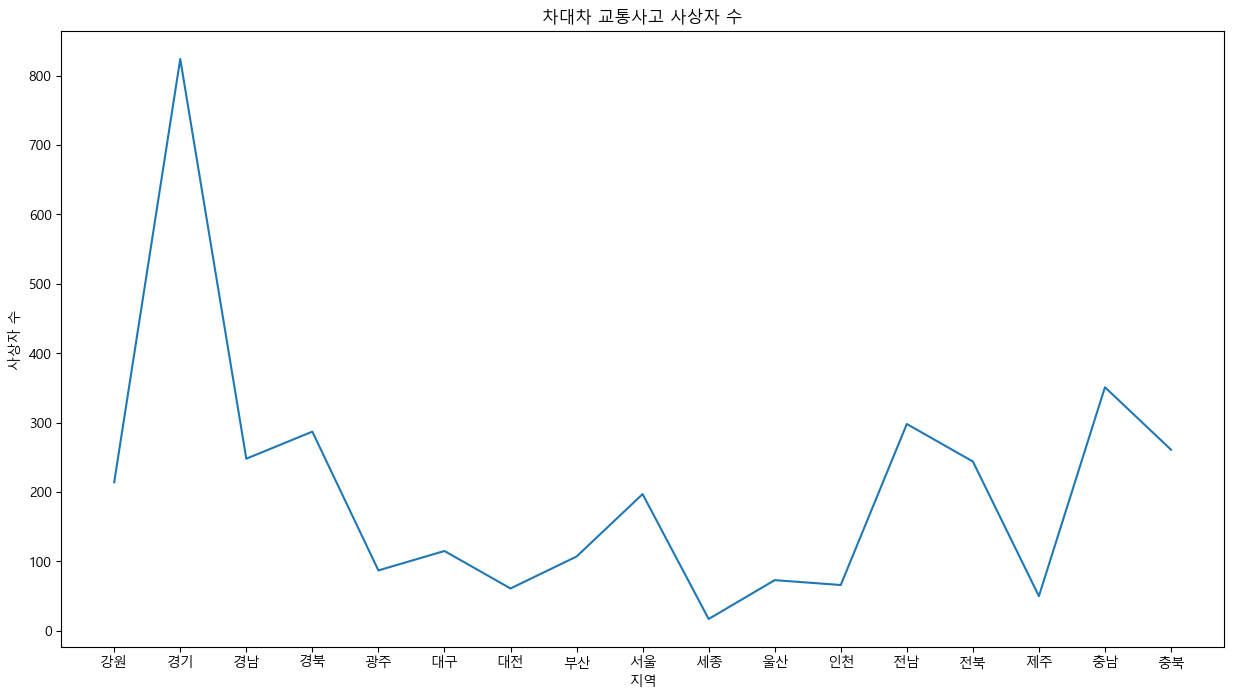

In [28]:
# 데이터를 입력해서 그래프를 그려주자
plt.figure(figsize=(15,8))
plt.plot(x,y)
plt.xlabel('지역')
plt.ylabel('사상자 수')
plt.title('차대차 교통사고 사상자 수')
plt.show()

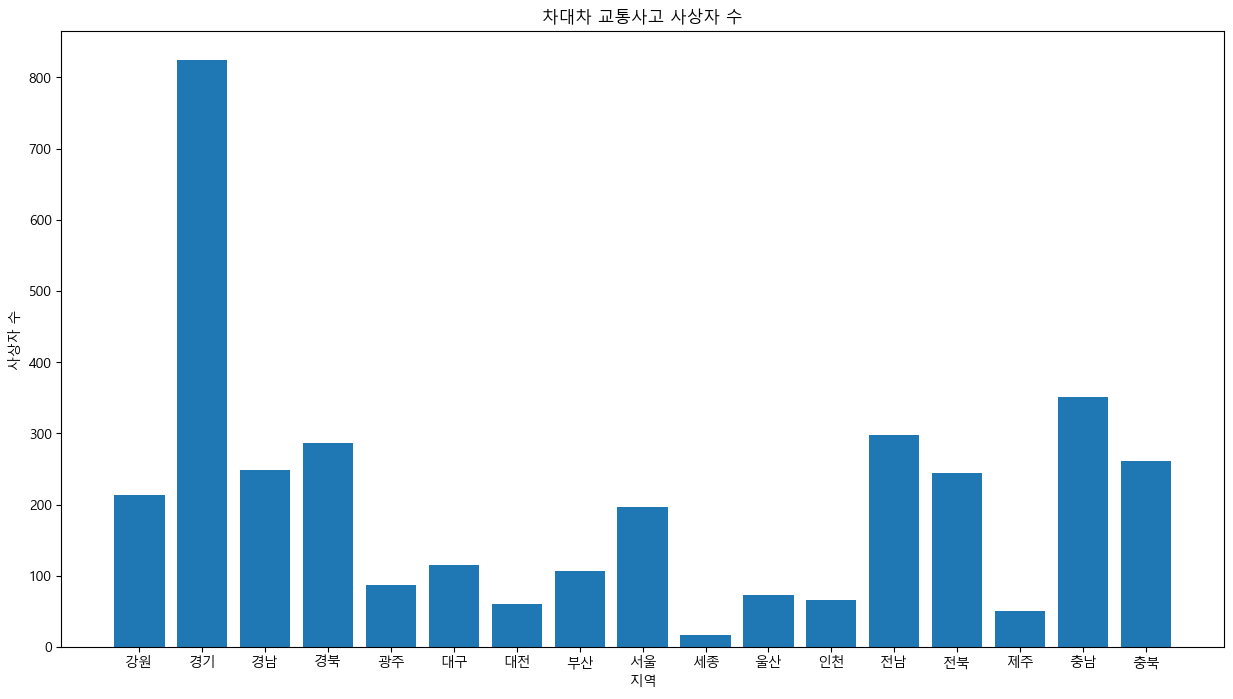

In [32]:
# 바 그래프를 그리기 위해서는 2차원 -> 1차원 데이터로 바꿔줘야한다.
y_bar = []
for i in range(len(y)) :
    y_bar.append(y[i][0])

# 데이터를 입력해서 그래프를 그려주자
plt.figure(figsize=(15,8))
plt.bar(x,y_bar)
plt.xlabel('지역')
plt.ylabel('사상자 수')
plt.title('차대차 교통사고 사상자 수')
plt.show()

### 종합 연습문제 3 <br>
- 교통사고가 가장 많이 발생하는 시간대를 알아보고 파이차트를 이용해서 시각화해보자


In [35]:
data.columns

Index(['발생년', '발생년월일시', '발생분', '주야', '요일', '사망자수', '사상자수', '중상자수', '경상자수',
       '부상신고자수', '발생지시도', '발생지시군구', '사고유형_대분류', '사고유형_중분류', '사고유형', '법규위반_대분류',
       '법규위반', '도로형태_대분류', '도로형태', '당사자종별_1당_대분류', '당사자종별_1당', '당사자종별_2당_대분류',
       '당사자종별_2당', '발생위치X_UTMK', '발생위치Y_UTMK', '경도', '위도'],
      dtype='object')

In [36]:
data['발생년월일시']

0       2017010101
1       2017010102
2       2017010102
3       2017010102
4       2017010104
           ...    
4060    2017123118
4061    2017123118
4062    2017123119
4063    2017123120
4064    2017123123
Name: 발생년월일시, Length: 4065, dtype: int64

In [37]:
# 발생년월일시에서 시간만 뽑아오자
time = data['발생년월일시'].astype('int64')
time %= 100
time

0        1
1        2
2        2
3        2
4        4
        ..
4060    18
4061    18
4062    19
4063    20
4064    23
Name: 발생년월일시, Length: 4065, dtype: int64

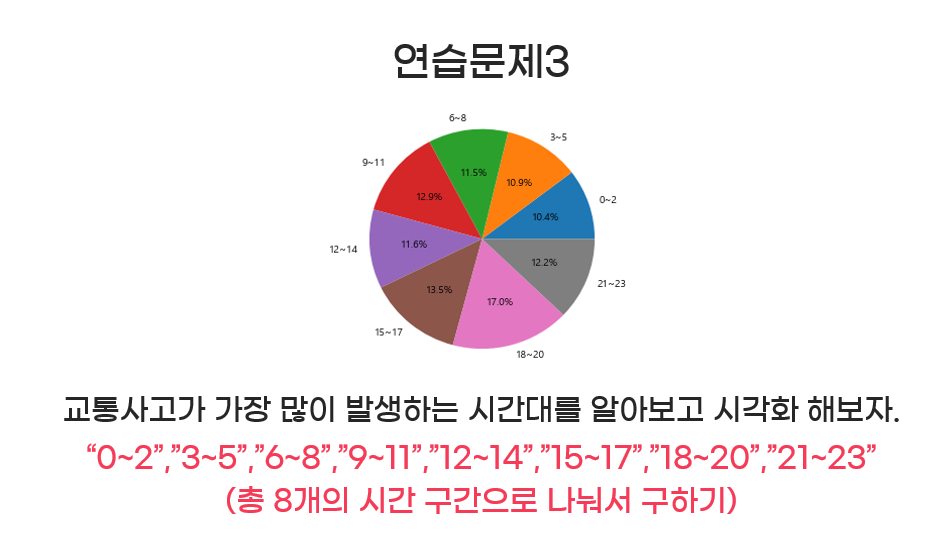

In [41]:
# 시간을 카테고리화 시켜보자
bins = [-1,2,5,8,11,14,17,20,23]
label = ['0~2', '3~5', '6~8', '9~11', '12~14', '15~17', '18~20', '21~23']
rs = pd.cut(time, bins, labels=label)
rs

0         0~2
1         0~2
2         0~2
3         0~2
4         3~5
        ...  
4060    18~20
4061    18~20
4062    18~20
4063    18~20
4064    21~23
Name: 발생년월일시, Length: 4065, dtype: category
Categories (8, object): ['0~2' < '3~5' < '6~8' < '9~11' < '12~14' < '15~17' < '18~20' < '21~23']

In [42]:
rs_data = rs.value_counts().sort_index()
rs_data

발생년월일시
0~2      421
3~5      444
6~8      466
9~11     526
12~14    472
15~17    550
18~20    692
21~23    494
Name: count, dtype: int64

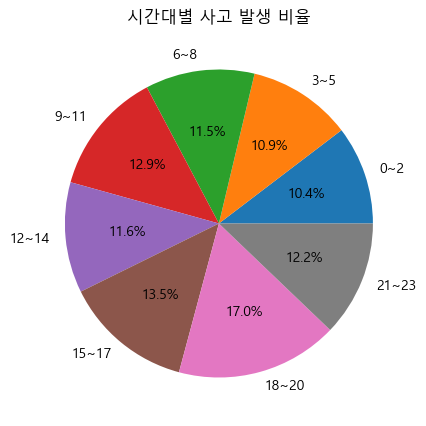

In [46]:
# 그래프 그리기
plt.figure(figsize=(5,5))
plt.pie(rs_data, labels=label, autopct='%1.1f%%')
plt.title('시간대별 사고 발생 비율')
plt.show()